In [ ]:
# !pip install face_recognition

## importação das Bibliotecas

In [ ]:
import face_recognition
import cv2
import numpy as np
import dlib
from google.colab.patches import cv2_imshow
import os

## Codificação de todas as faces de um diretório

In [ ]:
def get_encodings(diretorio):

    paths = [os.path.join(diretorio, f) for f in os.listdir(diretorio) if f.endswith('.jpg')]

    lista_encodings = []
    lista_nomes = []

    for img_path in paths:
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        nome = os.path.basename(img_path).split('.')[0]
        face_roi = face_recognition.face_locations(img_rgb, model='cnn')
        face_encodings = face_recognition.face_encodings(img_rgb, face_roi)[0]

        if len(face_encodings) > 0:
            lista_encodings.append(face_encodings)
            lista_nomes.append(nome)
        else:
            print(f'Não foi possivel detectar a face {img_path}')

    return lista_encodings, lista_nomes

In [ ]:
lista_encodings, lista_nomes = get_encodings('/content/fotos')

In [ ]:
def reconhece_faces(path, lista_encodings, lista_nomes, tolerancia=0.6, mostra_imagem=False, max_width=700):
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    # Buscando os descritores da imagem de teste
    face_roi = face_recognition.face_locations(img_rgb, model='cnn')
    face_encodings = face_recognition.face_encodings(img_rgb, face_roi)
    faces_nomes, conf = [], []

    # Fazendo a comparação da imagem com as imagens da base de dados
    for face_encoding in face_encodings:
        distancia = face_recognition.face_distance(lista_encodings, face_encoding)
        matches = face_recognition.compare_faces(lista_encodings, face_encoding, tolerance=tolerancia)
        nome = 'Nao identificado'
        idx_min_dist = np.argmin(distancia)
        if matches[idx_min_dist]:
            nome = lista_nomes[idx_min_dist]
        faces_nomes.append(nome)
        conf.append(distancia[idx_min_dist])
    face_roi = np.array(face_roi).astype(int)

    #
    for i, name in enumerate(faces_nomes):
        faces_nomes[i] = name.replace('_', ' ').title()

    # Criação do boudingbox nas imagens e escrevendo os nomes
    for face_loc, nome, conf in zip(face_roi, faces_nomes, conf):
        y1, x2, y2, x1 = face_loc[0], face_loc[1], face_loc[2], face_loc[3]
        cv2.putText(img, nome, (x1,y1-10), cv2.FONT_HERSHEY_DUPLEX, 0.8, (0,0,255), 2)
        cv2.rectangle(img, (x1, y1), (x2,y2), (0,255,0), 1)

    # Mostrando a imagem com o reconhecimento facial
    if mostra_imagem is True:
        cv2_imshow(img)

    return face_roi, faces_nomes, conf

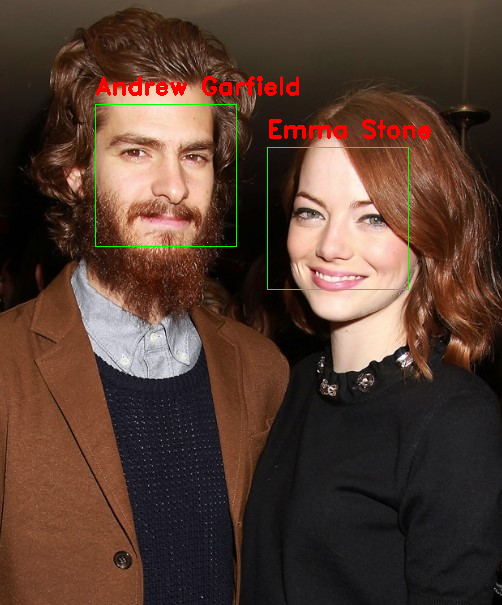

0.47319451995262496


In [ ]:
face_roi, faces_nomes, conf = reconhece_faces('/content/teste/andrew_emma.jpg', lista_encodings, lista_nomes, tolerancia=0.6, mostra_imagem=True)
print(conf)

In [ ]:
faces_nomes

['Andrew Garfield', 'Emma Stone']

In [ ]:
conf

[0.43852710813692763, 0.47319451995262496]

In [ ]:
face_roi

array([[104, 236, 246,  95],
       [147, 408, 289, 267]])